In [1]:
%matplotlib inline
from datetime import datetime
from pathlib import Path
import pandas as pd
import math
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import numpy as np
from dateutil.relativedelta import relativedelta
from IPython.display import display, Markdown

## COVID Cases by specimen date

In [2]:
# Read covid new cases data
cases_df = pd.read_csv("data/data_2022-Aug-24.csv")
cases_df = cases_df[["date", "newCasesBySpecimenDate"]]
cases_df["date"] = pd.to_datetime(cases_df['date'])

In [3]:
# Data starts on 29th Jan with the first UK Covid case; backfill to 1st Jan
def backfill_start(df, column_name):
    start_date = pd.to_datetime("2020-01-01")
    min_date = pd.to_datetime(min(df.date))
    days = (min_date - start_date).days

    fill_df = pd.DataFrame({"date": pd.date_range(start_date, periods=days), column_name: [0] * days})
    new_df = pd.concat([df, fill_df])
    new_df.set_index("date", inplace=True)
    new_df.sort_index(ascending=True, inplace=True)
    return new_df

In [4]:
cases_df = backfill_start(cases_df, "newCasesBySpecimenDate")

In [5]:
# Read significant OS dates (starts with 13th Mar 2020 BMJ blog post)
dates_from_os_timeline = pd.read_csv("data/os_dates.csv")
dates_from_os_timeline["date"] = pd.to_datetime(dates_from_os_timeline['date'])
dates_from_os_timeline.sort_values("date", inplace=True)

## COVID deaths within 28 days of positive test by date of death

In [6]:
# Read covid daily death data
deathsdf = pd.read_csv("data/data_deaths-2022-Aug-24.csv")
deathsdf = deathsdf[["date", "newDeaths28DaysByDeathDate"]]
deathsdf["date"] = pd.to_datetime(deathsdf['date'])

In [7]:
deathsdf = backfill_start(deathsdf, "newDeaths28DaysByDeathDate")

In [8]:
def plot_with_os_dates(df, os_dates_df, stop_date=None, show_publications=True):
    """
    Plot covid DF with OS dates from 01 Jan 2020.
    If a stop date is given, only plot up to that date.
    """
    outdir = "charts" if show_publications else "charts-no-publications"
    Path(outdir).mkdir(exist_ok=True, parents=True)
    os_dates_df_to_stop_date = os_dates_df.copy()
    os_dates_df_to_stop_date.set_index("date", inplace=True)
    if stop_date:
        df_to_stop_date = df.loc[min(df.index):stop_date]        
        os_dates_df_to_stop_date = os_dates_df_to_stop_date.loc[min(os_dates_df_to_stop_date.index):stop_date]
    else:
        df_to_stop_date = df.copy()
        
    fig, ax = plt.subplots()
    plt.plot(df_to_stop_date, 'r')
    _, endy = ax.get_ylim()
    ax.set_ylim(0, endy)
    ax.xaxis.set_major_formatter(DateFormatter('%d %b %Y'))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_yaxis().set_ticks([])

    # Add vertical lines for:
    # OS-significant dates (grey)
    # Covid-19 dates - lockdowns, vaccination start etc (blue)
    # publications - yellow
    event_colours = {"os": "b", "c19": "darkgrey", "pub": "gold"}
    for i, row in os_dates_df_to_stop_date.iterrows():
        if row.event != "pub" or show_publications:
            np_date = np.float64(np.datetime64(i.date()))
            plt.axvline(np_date, color=event_colours[row.event], linestyle='--')

    fig = plt.gcf()
    fig.set_size_inches(20, 2)
    

    plt.show()
    if stop_date:
        fig.savefig(f"{outdir}/{stop_date.strftime('%Y-%m-%d')}.png", bbox_inches="tight", transparent=True)

In [9]:
def plot_with_slide_dates(df, os_dates_df, stop_date, slide_number):
    """
    Plot covid DF with OS dates from 01 Jan 2020, highlighted per slide.
    """
    outdir = "charts-with-slide-dates"
    Path(outdir).mkdir(exist_ok=True, parents=True)
    os_dates_df_to_stop_date = os_dates_df.copy()
    os_dates_df_to_stop_date.set_index("date", inplace=True)
    df_to_stop_date = df.loc[min(df.index):stop_date]        
    os_dates_df_to_stop_date = os_dates_df_to_stop_date.loc[min(os_dates_df_to_stop_date.index):stop_date]
        
    fig, ax = plt.subplots()
    plt.plot(df_to_stop_date, 'r')
    _, endy = ax.get_ylim()
    ax.set_ylim(0, endy)
    ax.xaxis.set_major_formatter(DateFormatter('%d %b %Y'))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_yaxis().set_ticks([])

    # Add vertical lines for:
    # OS-significant dates
    # Covid-19 dates - lockdowns, vaccination start etc
    # publications
    # All lines grey except ones relevant to this slide
    for i, row in os_dates_df_to_stop_date.iterrows():
        np_date = np.float64(np.datetime64(i.date()))
        col = 'b' if row.slide == slide_number else 'grey'
        plt.axvline(np_date, color=col, linestyle='--')

    fig = plt.gcf()
    fig.set_size_inches(20, 2)
    

    plt.show()
    if stop_date:
        fig.savefig(f"{outdir}/{stop_date.strftime('%Y-%m-%d')}.png", bbox_inches="tight", transparent=True)

### COVID deaths (with OS dates)

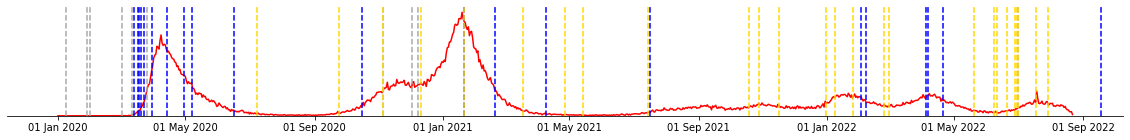

In [13]:
plot_with_os_dates(deathsdf, dates_from_os_timeline)

### COVID cases (with OS dates)

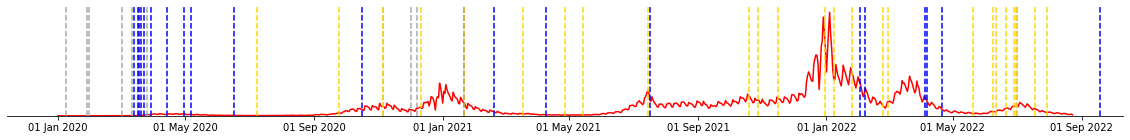

In [14]:
plot_with_os_dates(cases_df, dates_from_os_timeline)

## 31 Jan 2020

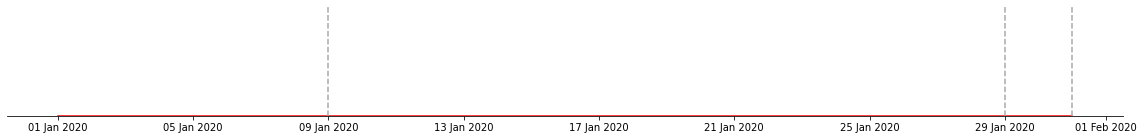

## 13 Mar 2020

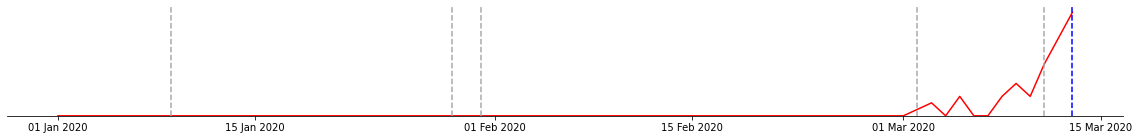

## 18 Mar 2020

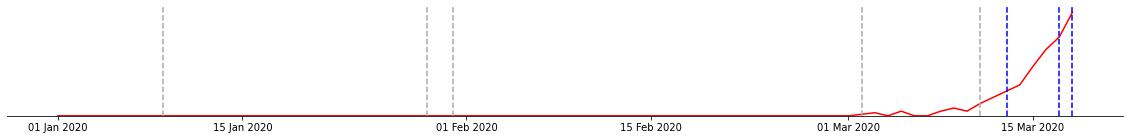

## 30 Mar 2020

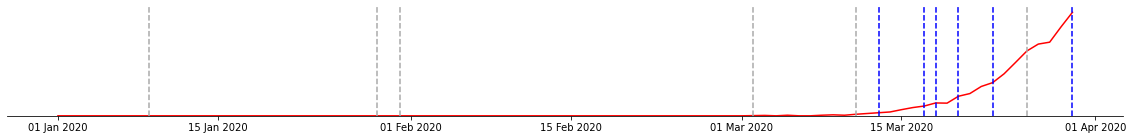

## 30 Apr 2020

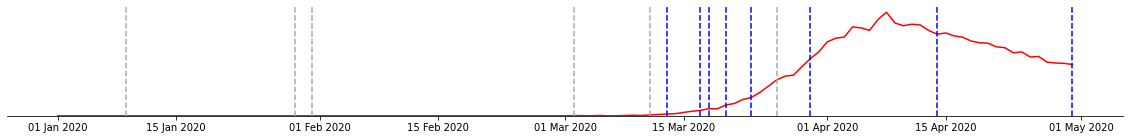

## 07 May 2020

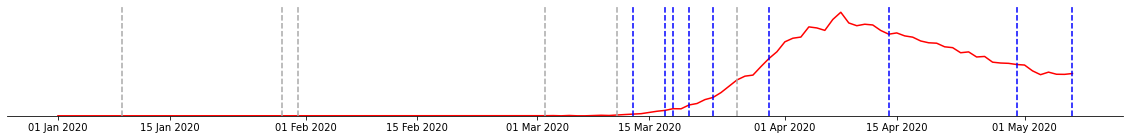

## 16 Oct 2020

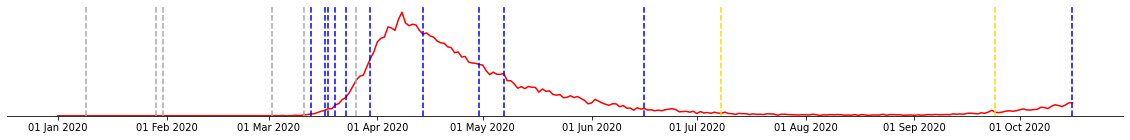

## 08 Dec 2020

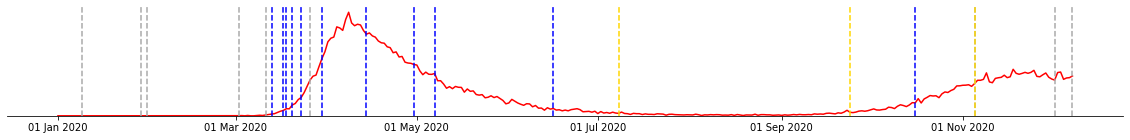

## 21 Jan 2021

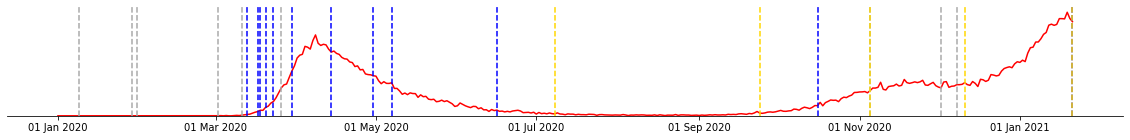

## 19 Feb 2021

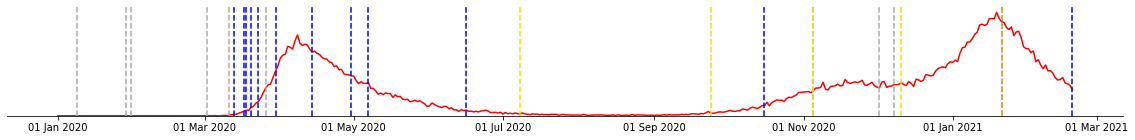

## 17 Jul 2021

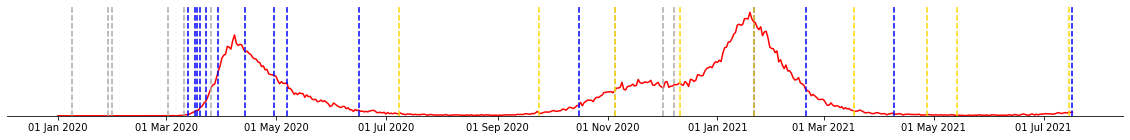

## 31 Dec 2021

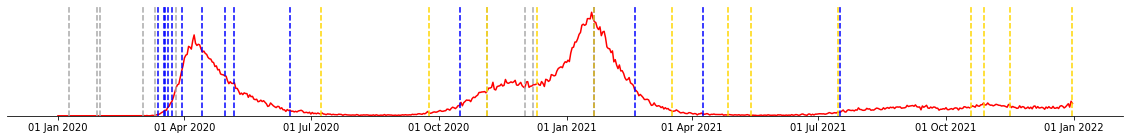

## 30 Jul 2022

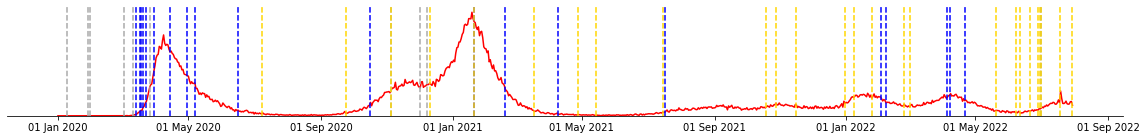

In [15]:
for i, row in dates_from_os_timeline.iterrows():
    if row.show == "y":
        display(Markdown(f"## {row.date.strftime('%d %b %Y')}"))
        plot_with_os_dates(deathsdf, dates_from_os_timeline, row.date)

## 31 Jan 2020

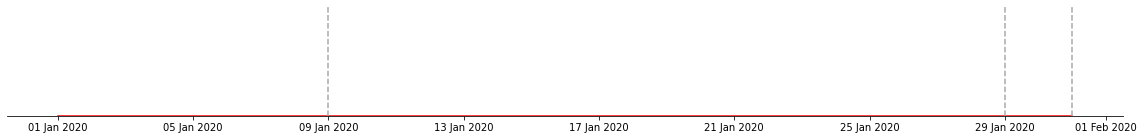

## 13 Mar 2020

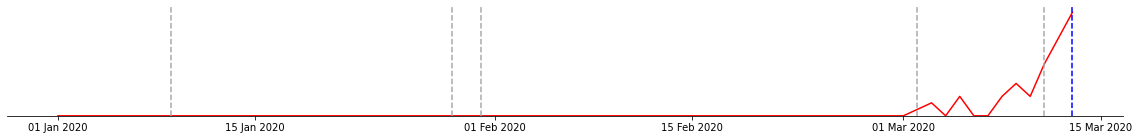

## 18 Mar 2020

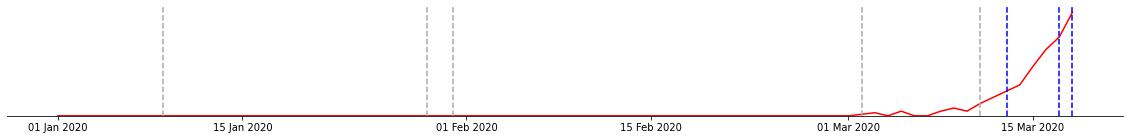

## 30 Mar 2020

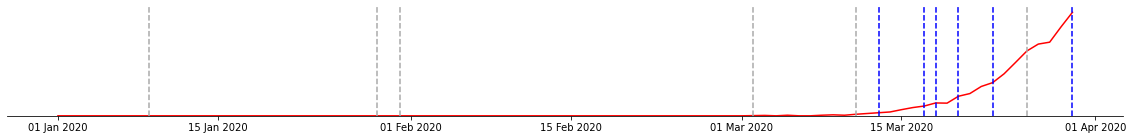

## 30 Apr 2020

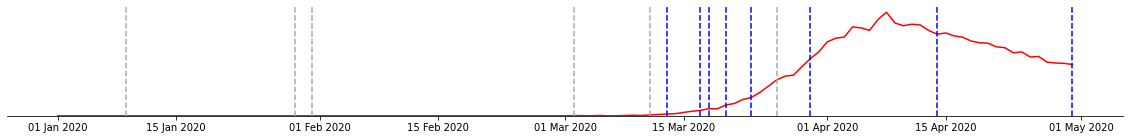

## 07 May 2020

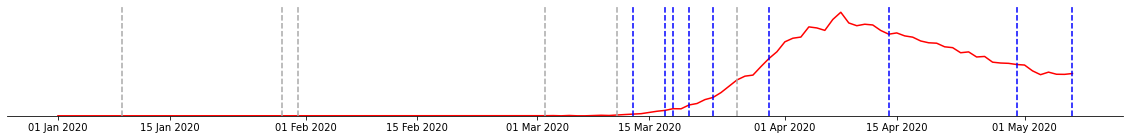

## 16 Oct 2020

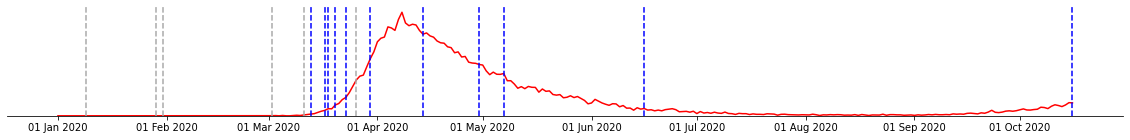

## 08 Dec 2020

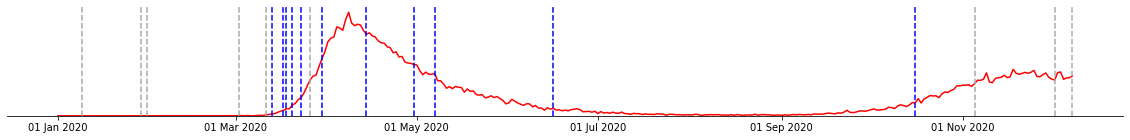

## 21 Jan 2021

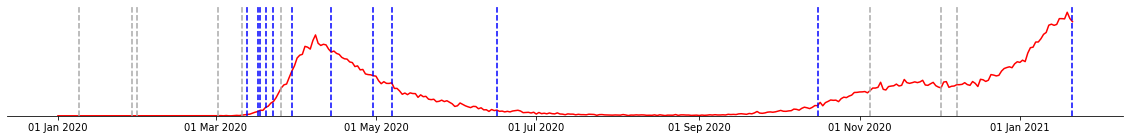

## 19 Feb 2021

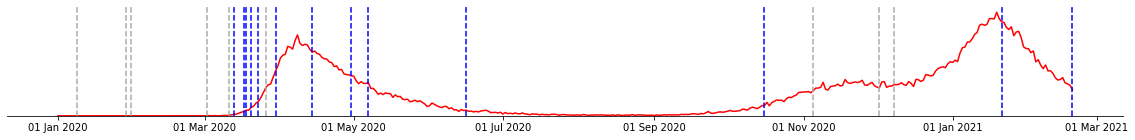

## 17 Jul 2021

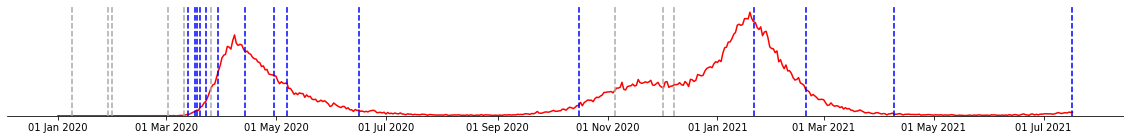

## 31 Dec 2021

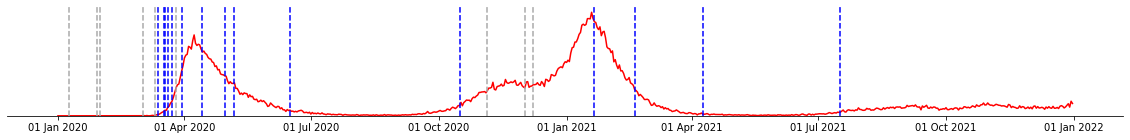

## 30 Jul 2022

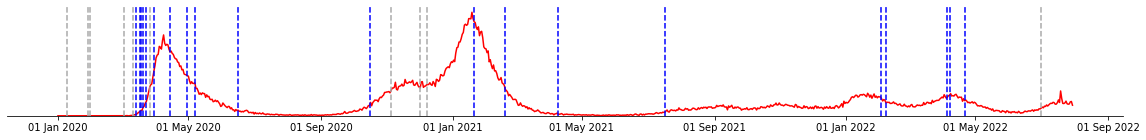

In [11]:
for i, row in dates_from_os_timeline.iterrows():
    if row.show == "y":
        display(Markdown(f"## {row.date.strftime('%d %b %Y')}"))
        plot_with_os_dates(deathsdf, dates_from_os_timeline, row.date, show_publications=False)

## 31 Jan 2020

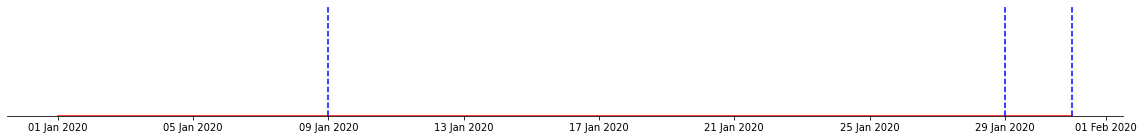

## 13 Mar 2020

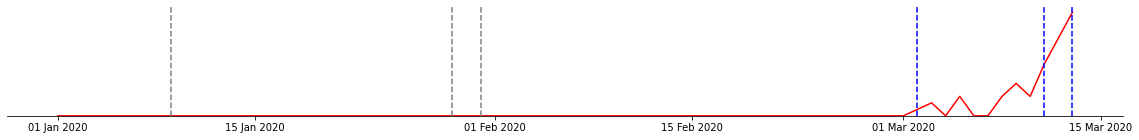

## 18 Mar 2020

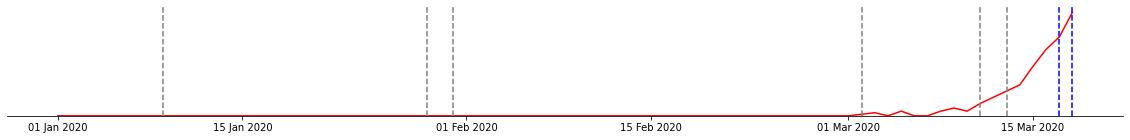

## 30 Mar 2020

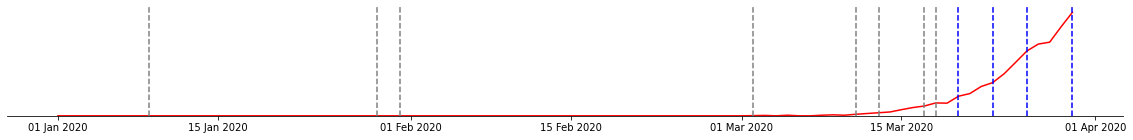

## 30 Apr 2020

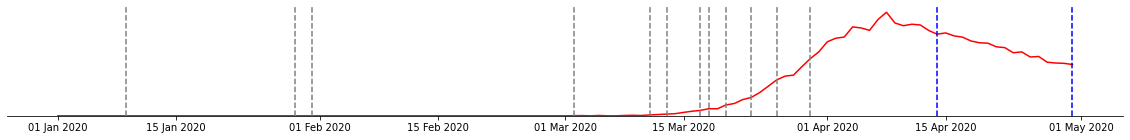

## 07 May 2020

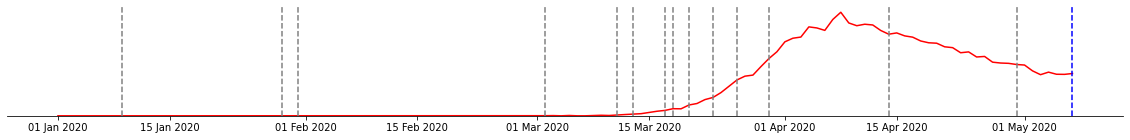

## 16 Oct 2020

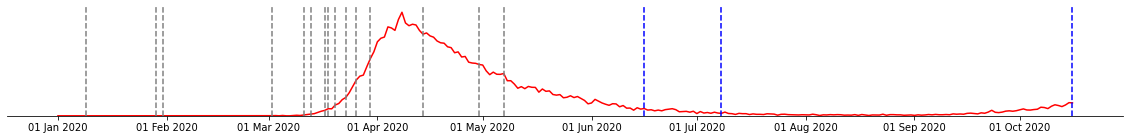

## 08 Dec 2020

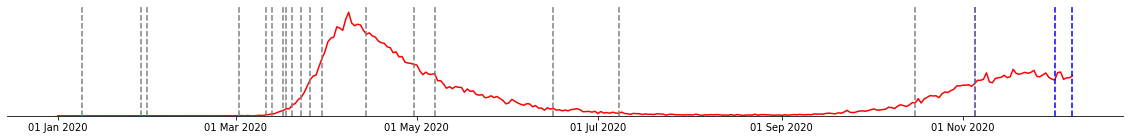

## 21 Jan 2021

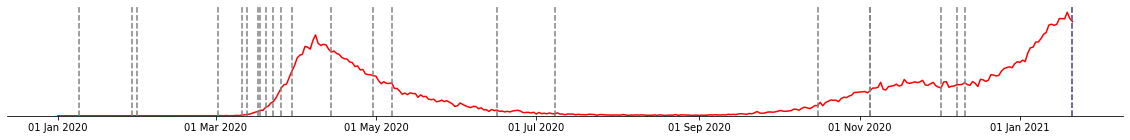

## 19 Feb 2021

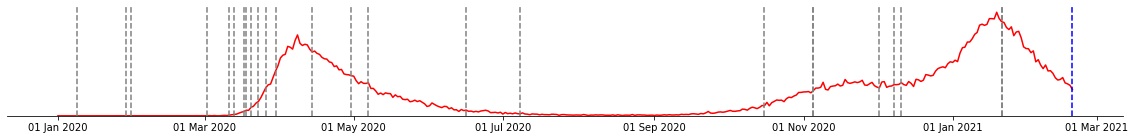

## 17 Jul 2021

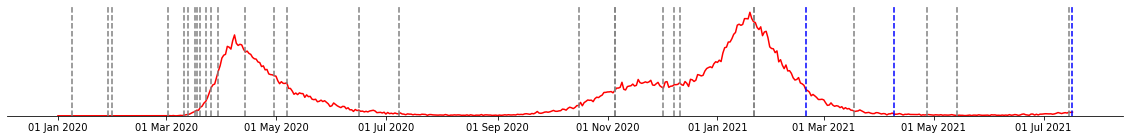

## 31 Dec 2021

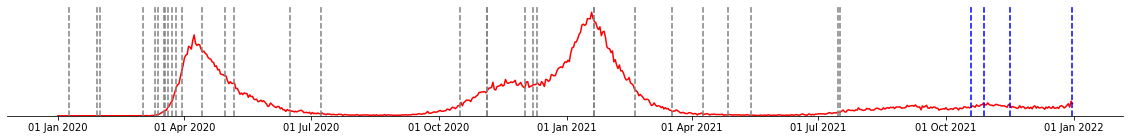

## 30 Jul 2022

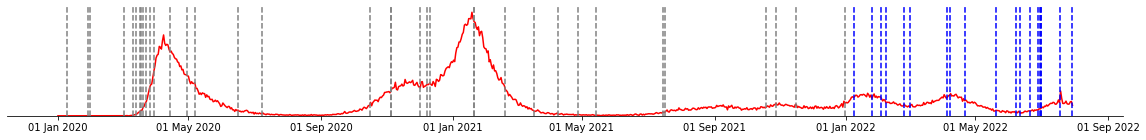

In [10]:
for i, row in dates_from_os_timeline.iterrows():
    if row.show == "y":
        display(Markdown(f"## {row.date.strftime('%d %b %Y')}"))
        plot_with_slide_dates(deathsdf, dates_from_os_timeline, row.date, row.slide)